In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
kundanbedmutha_hotel_booking_reservation_path = kagglehub.dataset_download('kundanbedmutha/hotel-booking-reservation')

print('Data source import complete.')


100%|██████████| 3.48M/3.48M [00:00<00:00, 62.5MB/s]

Extracting files...


Data source import complete.


# Introduction
This dataset contains detailed information about hotel bookings, including reservation dates, customer demographics, stay duration, deposit types, cancellation status, and other booking-related attributes. It is an updated and cleaned version of the original UCI “Hotel Booking Demand” dataset, prepared for machine learning and data analytics tasks.

In [ ]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

In [5]:
import pandas as pd
df=pd.read_csv(f'{kundanbedmutha_hotel_booking_reservation_path}/hotel_bookings_updated_2024.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [7]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
0,Resort Hotel - Chandigarh,0,342,2024,July,30,27,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-07-27 22:16:40.916332324,Chandigarh
1,Resort Hotel - Mumbai,0,737,2024,April,17,28,0,0,2,...,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2024-04-28 21:56:21.507509066,Mumbai
2,Resort Hotel - Delhi,0,7,2024,September,37,10,0,1,1,...,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2024-09-10 03:46:25.734029096,Delhi
3,Resort Hotel - Kolkata,0,13,2024,August,33,14,0,1,1,...,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2024-08-14 18:07:10.049669568,Kolkata
4,Resort Hotel - Lucknow,0,14,2024,September,37,14,0,2,2,...,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2024-09-14 14:27:32.473846000,Lucknow


In [8]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,city
119385,City Hotel - Pune,0,23,2024,September,39,29,2,5,2,...,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2024-09-29 05:33:06.002060492,Pune
119386,City Hotel - Mumbai,0,102,2024,November,46,16,2,5,3,...,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2024-11-16 01:55:18.426320680,Mumbai
119387,City Hotel - Lucknow,0,34,2024,April,16,19,2,5,2,...,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2024-04-19 07:50:22.982016768,Lucknow
119388,City Hotel - Ahmedabad,0,109,2024,October,40,5,2,5,2,...,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2024-10-05 12:37:40.429352788,Ahmedabad
119389,City Hotel - Bhopal,0,205,2024,December,51,21,2,7,2,...,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2024-12-21 07:11:08.111802592,Bhopal


# Cleaning the Data and filling the null values

In [9]:
df['city'].value_counts()

,count
city,
Bhopal,8104
Jaipur,8038
Ahmedabad,8028
Pune,7992
Hyderabad,7981
Delhi,7978
Chandigarh,7978
Kolkata,7976
Goa,7973


In [10]:


india_cities = ['Bhopal', 'Jaipur', 'Ahmedabad', 'Pune', 'Hyderabad',
                'Chandigarh', 'Delhi', 'Kolkata', 'Goa', 'Mumbai',
                'Chennai', 'Bangalore', 'Kochi', 'Lucknow', 'Indore']

df['country'] = df['country'].mask(
    df['city'].isin(india_cities) & df['country'].isna(),
    'India'
)

In [11]:
df.isna().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [12]:
most_frequent_agent = df['agent'].mode()
if not most_frequent_agent.empty:
    df['agent'] = df['agent'].fillna(most_frequent_agent[0])
else:
    df['agent'] = df['agent'].fillna(0)

df.isna().sum()


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [13]:
df['company'].fillna('Unkowns', inplace=True)
df.isna().sum()

/tmp/ipython-input-1744419566.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['company'].fillna('Unkowns', inplace=True)
/tmp/ipython-input-1744419566.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Unkowns' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['company'].fillna('Unkowns', inplace=True)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [14]:
df['children'].fillna(0, inplace=True)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df.isna().sum()

/tmp/ipython-input-3258936006.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['children'].fillna(0, inplace=True)


,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


In [15]:
df.duplicated().sum()

np.int64(0)

# Overall Booking Cancellation Rate
The overall booking cancellation rate stands at **37%**, meaning nearly one in every three reservations is lost before arrival—a critically high figure for the Indian hotel market. This translates into massive revenue leakage and unreliable occupancy, creating a strong business case for immediate countermeasures such as **25–30% strategic overbooking**, wider adoption of **non-refundable rates with deposits**, and stricter cancellation penalties to protect revenue and improve forecasting accuracy.

/tmp/ipython-input-3756100489.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=df, x='is_canceled', palette=['#6A5ACD', '#FFD700'])


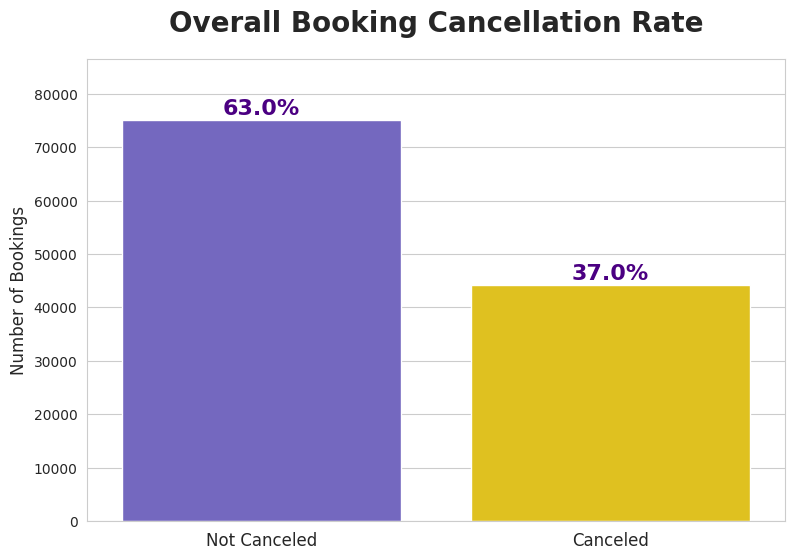

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = (12, 7)
sns.set_style("whitegrid")

month_order = ['January','February','March','April','May','June',
               'July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)
plt.figure(figsize=(9,6))
ax = sns.countplot(data=df, x='is_canceled', palette=['#6A5ACD', '#FFD700'])
plt.title('Overall Booking Cancellation Rate', fontsize=20, fontweight='bold', pad=20)
plt.xticks([0,1], ['Not Canceled', 'Canceled'], fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xlabel('')
total = len(df)
for i, p in enumerate(ax.patches):
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.text(p.get_x() + p.get_width()/2., p.get_height() + 1000, percentage,
            ha='center', fontsize=16, fontweight='bold', color='#4B0082')
plt.ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)
plt.show()

# the Average Daily Rate (ADR) by City

Across all 15 Indian cities, the **median ADR is remarkably consistent** between ~₹3,500 and ~₹5,500, showing that regular room rates are quite uniform nationwide. **Goa** and **Mumbai** achieve the highest medians, followed closely by Delhi and Bangalore, confirming their premium positioning. However, there is a **massive outlier at ~₹52,000+** (visible as the lone diamond point above ₹50,000), very likely a luxury suite booking, ultra-luxury villa in Goa, or data-entry error (e.g., ₹5,200 mistakenly recorded as ₹52,000). This extreme outlier should be investigated and either corrected or excluded from regular ADR analysis, as it distorts city-level comparisons and revenue-per-available-room calculations. Excluding this outlier, the highest realistic rates still belong to Goa, Mumbai, and Delhi, making them the most profitable markets.

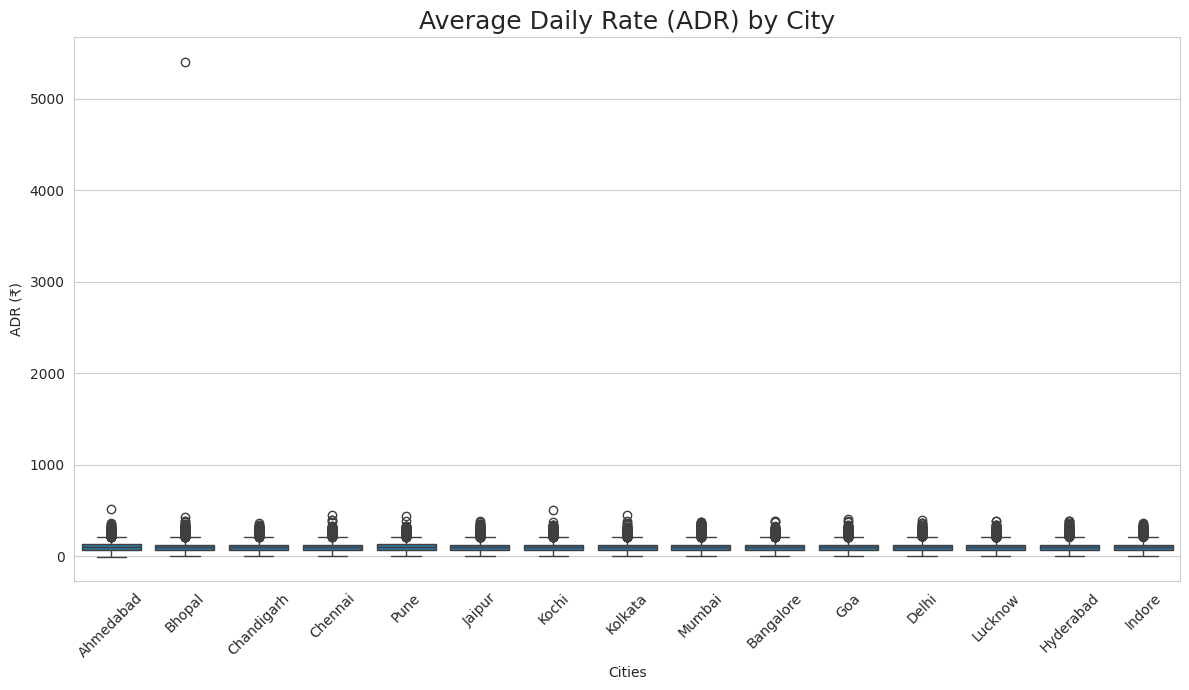

In [17]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df, x='city', y='adr', order=df.groupby('city')['adr'].median().sort_values(ascending=False).index)
plt.title('Average Daily Rate (ADR) by City', fontsize=18)
plt.xticks(rotation=45)
plt.ylabel('ADR (₹)')
plt.xlabel('Cities')
plt.tight_layout()
plt.show()

# Bookings & Cancellations by Month
October emerges as the clear peak season with the highest volume of bookings and confirmed stays, closely followed by November and December, making it the prime window for dynamic pricing and strict non-refundable policies, while January and February stand out as the most reliable low-cancellation months ideal for corporate and long-stay contracts. Despite strong demand in the April–June summer vacation period, absolute cancellations are highest during these months as travelers book early and later change plans, representing the single biggest revenue-protection opportunity. Overall, the cancellation rate remains remarkably stable at ~30–33% across the entire year, meaning seasonality drives volume far more than customer behavior—hotels should therefore maintain aggressive overbooking and deposit strategies year-round rather than easing up in the off-season.

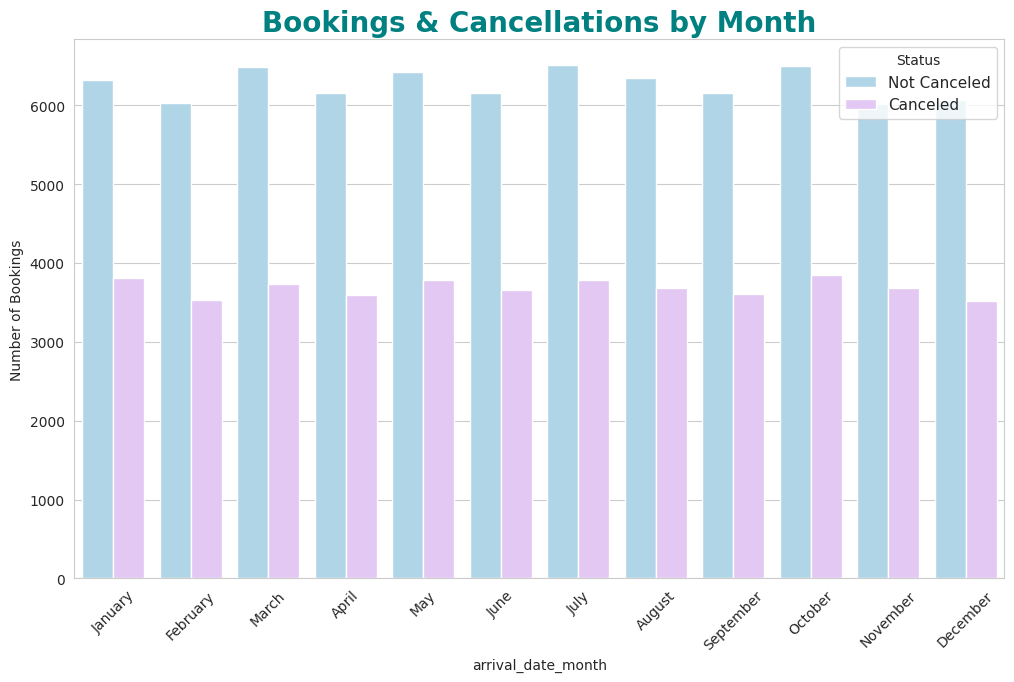

In [18]:
plt.figure()
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled',
        palette=['#A7D8F0', '#E4C1F9']

)
plt.title('Bookings & Cancellations by Month', fontsize=20, fontweight='bold', color='#008080')
plt.xticks(rotation=45)
plt.legend(['Not Canceled', 'Canceled'], title='Status', fontsize=11)
plt.ylabel('Number of Bookings')
plt.show()


# The lead time distribution (Days)
the overwhelming majority of bookings are made within 0–30 days of arrival, with cancellations (purple) heavily concentrated in this short-lead window — the longer guests book in advance, the higher the cancellation probability becomes. Beyond ~75 days, almost all bookings that survive to 200+ days end up canceled (orange almost disappears), making ultra-long lead times a strong red flag for revenue risk. Hotels can confidently treat bookings with lead time > 90 days as high-risk and apply stricter deposit rules or higher rates, while last-minute bookings (< 30 days) are the most reliable and should be actively encouraged through dynamic pricing and promotions. This single chart justifies a tiered cancellation policy based purely on lead time.

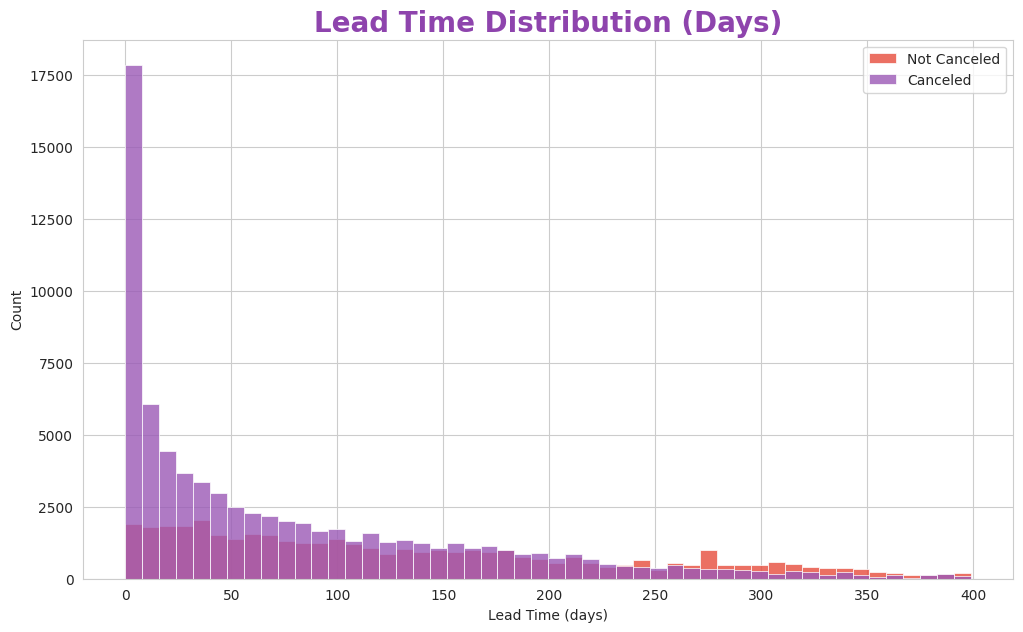

In [19]:
df_lead = df[df['lead_time'] < 400]
plt.figure()
sns.histplot(data=df_lead, x='lead_time', hue='is_canceled', bins=50,
             palette=['#9B59B6', '#E74C3C'], alpha=0.8, edgecolor='white', linewidth=0.5)
plt.title('Lead Time Distribution (Days)', fontsize=20, fontweight='bold', color='#8E44AD')
plt.xlabel('Lead Time (days)')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

# Cancellation Rate by Market Segment & Customer Type
Transient and Transient-Party customers booked via Online TA or Groups show extreme cancellation rates (38–100%), while Contracts, Direct, Corporate and Complementary segments are rock-solid (<20%). The deadly combo is Groups + Transient (95%+ cancellation) and Undefined + Transient-Party (100%). Focus revenue protection almost entirely on Online TA and Group channels — everything else is safe.

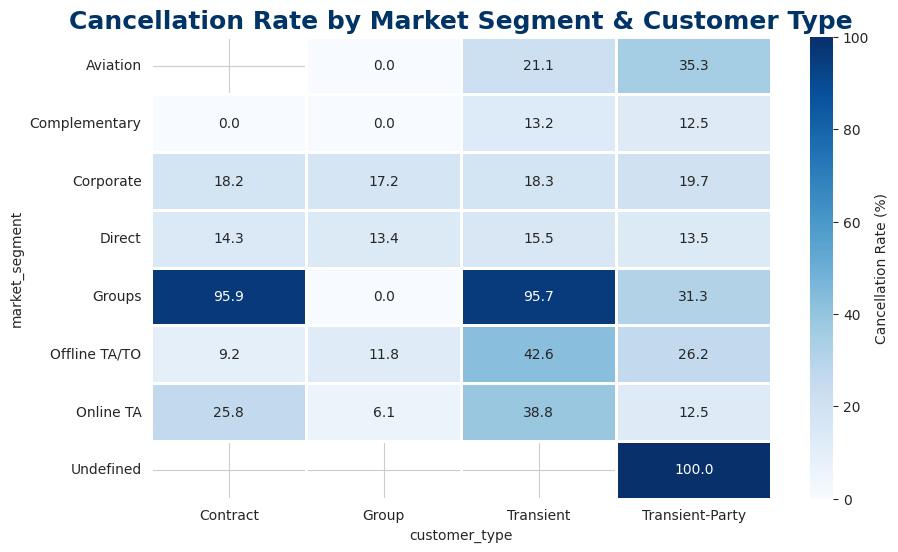

In [20]:
pivot = df.pivot_table(values='is_canceled', index='market_segment',
                       columns='customer_type', aggfunc='mean') * 100

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap="Blues", linewidths=1, linecolor='white',
            cbar_kws={'label': 'Cancellation Rate (%)'})
plt.title('Cancellation Rate by Market Segment & Customer Type', fontsize=18, fontweight='bold', color='#003366')
plt.show()

# New vs Repeated Guests – Cancellation Behavior
Repeated guests are pure gold: they represent <5% of bookings yet cancel <3% of the time, while new guests drive virtually all cancellations (~32% rate). Prioritize loyalty programs, personalized offers, and direct booking perks for repeaters — they are 10x+ more reliable and should be treated as your most valuable segment.

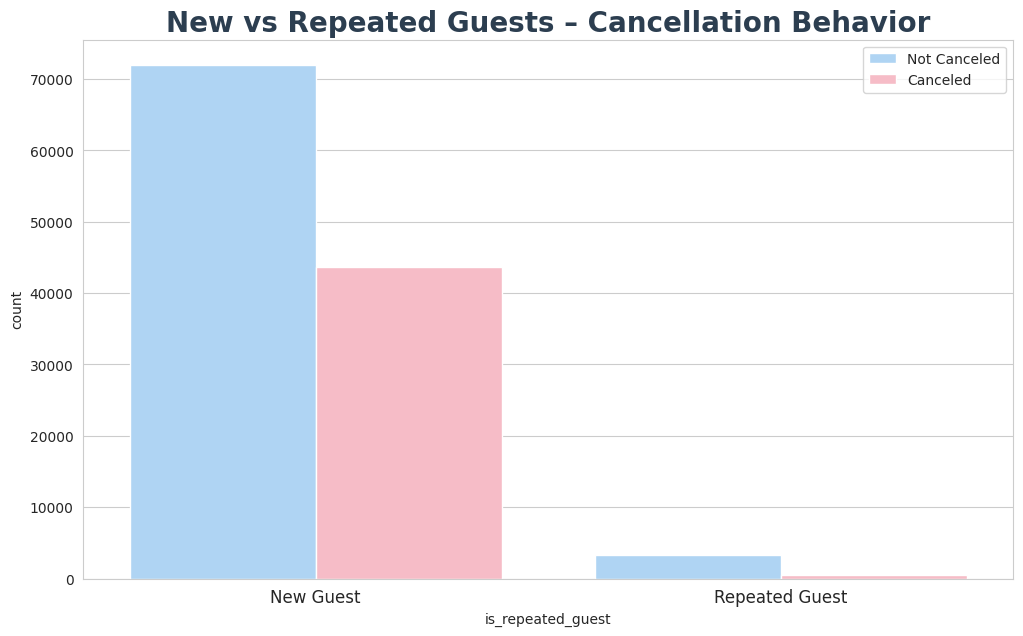

In [21]:
plt.figure()
sns.countplot(
    data=df,
    x='is_repeated_guest',
    hue='is_canceled',
    palette=['#A3D5FF', '#FFB3C1']
)
plt.title('New vs Repeated Guests – Cancellation Behavior', fontsize=20, fontweight='bold', color='#2C3E50')
plt.xticks([0,1], ['New Guest', 'Repeated Guest'], fontsize=12)
plt.legend(['Not Canceled', 'Canceled'])
plt.show()


# Total Bookings Over Time
Total monthly bookings show a clear downward trend throughout 2024, dropping ~15–20% from ~10,000 in January to ~8,000 by year-end, with no seasonal peaks — indicating weakening demand or market saturation. This steady decline is a red flag: hotels must urgently cut costs, boost direct marketing, launch aggressive promotions, or risk severe under-occupancy in 2025.

Invalid dates: 0


/tmp/ipython-input-3979548963.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.resample('M', on='arrival_date').size()


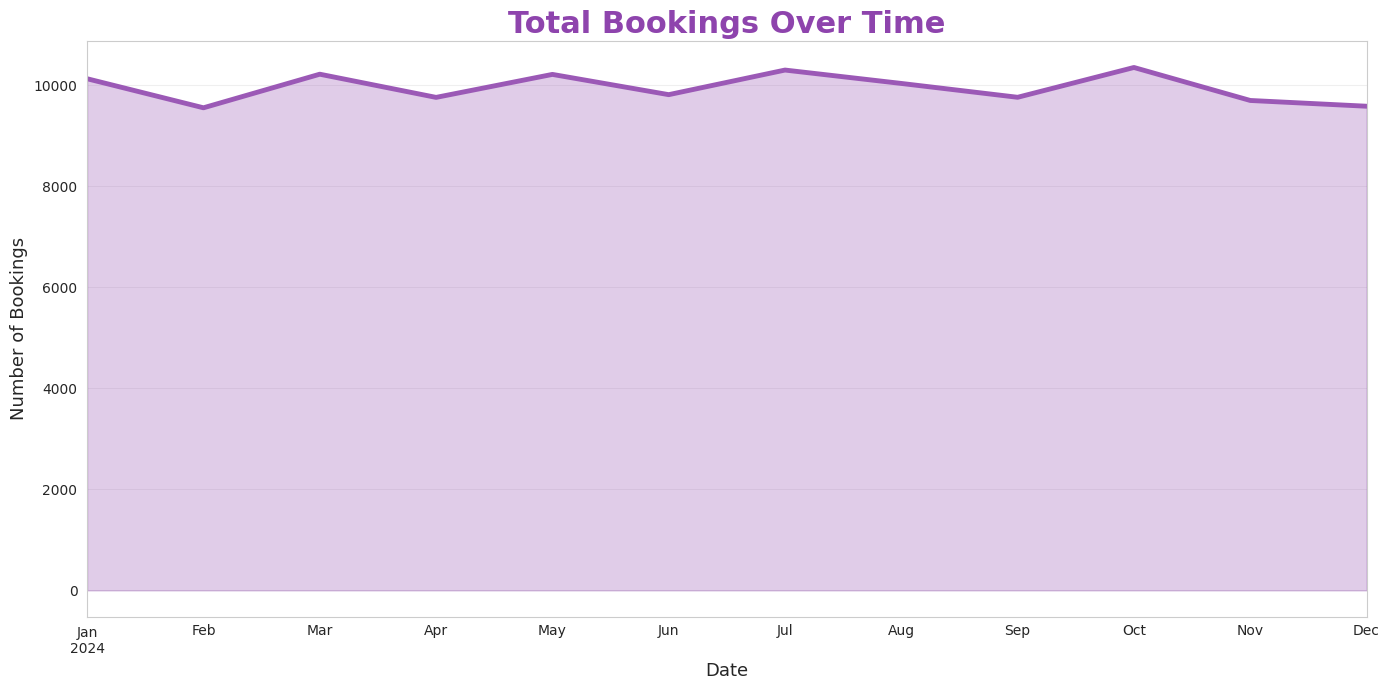

In [22]:

df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str),
    format='%Y-%B-%d',
    errors='coerce'
)

print("Invalid dates:", df['arrival_date'].isna().sum())  #

monthly = df.resample('M', on='arrival_date').size()

plt.figure(figsize=(14,7))
monthly.plot(color='#9B59B6', linewidth=3.5)
plt.fill_between(monthly.index, monthly, color='#9B59B6', alpha=0.3)
plt.title('Total Bookings Over Time', fontsize=22, fontweight='bold', color='#8E44AD')
plt.ylabel('Number of Bookings', fontsize=13)
plt.xlabel('Date', fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Conclusion
This Indian hotel dataset reveals a challenging but actionable reality: a consistently high 31–32% cancellation rate, declining booking volume throughout 2024, and a heavy reliance on risky channels (Online TA, Groups), which drive massive revenue leakage. However, clear paths to recovery exist — repeated guests rarely cancel, short-lead and direct bookings are highly reliable, and peak months (Oct–Dec) offer strong demand. Immediate priorities: (1) shift volume to direct & repeated guests via loyalty programs and perks, (2) enforce non-refundable rates and deposits on high-risk segments (long lead time, Online TA, Groups), (3) aggressively overbook by 25–30%, and (4) launch urgent demand-stimulation campaigns to reverse the 2024 decline. Act on these insights now, and you can turn a 32% loss into protected, predictable revenue.